### INTRODUCTION

This is part of a series in the Nigeria data professionals ecosystem project . The scraping was ran twice with different job titles so as to gather more data, with more diversity in the data fields

The project focus on taking a deep dive into analyzing Job applications in the Nigeria tech industry and extracting insights from the stated Job requirements

In [2]:
import pandas as pd
import re
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mp
mp.rcParams['figure.figsize'] = (10,6)
plt.style.use ('ggplot')
from wordcloud import WordCloud

In [3]:
df = pd.read_json('Data Scientist_Nigeria.json')
df.to_csv('data_science.csv')

In [4]:
df=pd.read_csv('data_science.csv')

In [5]:
df.head()

,Unnamed: 0,job_title,company_name,location,description,workplace_type
0,0,"Java Software Engineer, Trilogy (Remote) - $20...",['Crossover'],['Nigeria'],About the job\nCrossover is the world's #1 sou...,Remote
1,1,BI Analyst,['Kuda'],['Nigeria'],About the job\nDescription\n\nSummary\n\nKuda ...,On-site
2,2,Jr. ML Engineer - 1,['Turing'],"['Lagos, Lagos State, Nigeria']",About the job\nA multi-billion pharmaceutical ...,Remote
3,3,Analista de Datos,['Turing'],"['Lagos, Lagos State, Nigeria']","About the job\nEn Turing, ayudamos a los progr...",Remote
4,4,Python Data Scientist at eHealth4everyone,['eHealth4everyone'],"['Abuja, Federal Capital Territory, Nigeria']",About the job\nNever Miss a Job Update Again. ...,On-site


In [6]:
df1 = pd.read_json('Data Analyst_Nigeria.json')
df1.to_csv('data_analyst.csv')

Lets stitch the data frames together so as to get one dataframe 

In [7]:
df2=pd.concat(map(pd.read_csv, ['data_science.csv', 'data_analyst.csv']))

df2.to_csv("Linkedin.csv")

In [8]:
df=pd.read_csv('Linkedin.csv')

In [9]:
df.head()

,Unnamed: 0,Unnamed: 0.1,job_title,company_name,location,description,workplace_type
0,0,0,"Java Software Engineer, Trilogy (Remote) - $20...",['Crossover'],['Nigeria'],About the job\nCrossover is the world's #1 sou...,Remote
1,1,1,BI Analyst,['Kuda'],['Nigeria'],About the job\nDescription\n\nSummary\n\nKuda ...,On-site
2,2,2,Jr. ML Engineer - 1,['Turing'],"['Lagos, Lagos State, Nigeria']",About the job\nA multi-billion pharmaceutical ...,Remote
3,3,3,Analista de Datos,['Turing'],"['Lagos, Lagos State, Nigeria']","About the job\nEn Turing, ayudamos a los progr...",Remote
4,4,4,Python Data Scientist at eHealth4everyone,['eHealth4everyone'],"['Abuja, Federal Capital Territory, Nigeria']",About the job\nNever Miss a Job Update Again. ...,On-site


In [10]:
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1,inplace=True)

In [11]:
df.head()

,job_title,company_name,location,description,workplace_type
0,"Java Software Engineer, Trilogy (Remote) - $20...",['Crossover'],['Nigeria'],About the job\nCrossover is the world's #1 sou...,Remote
1,BI Analyst,['Kuda'],['Nigeria'],About the job\nDescription\n\nSummary\n\nKuda ...,On-site
2,Jr. ML Engineer - 1,['Turing'],"['Lagos, Lagos State, Nigeria']",About the job\nA multi-billion pharmaceutical ...,Remote
3,Analista de Datos,['Turing'],"['Lagos, Lagos State, Nigeria']","About the job\nEn Turing, ayudamos a los progr...",Remote
4,Python Data Scientist at eHealth4everyone,['eHealth4everyone'],"['Abuja, Federal Capital Territory, Nigeria']",About the job\nNever Miss a Job Update Again. ...,On-site


In [12]:
job_popularity = (df.job_title.str.split('|')).explode().value_counts().sort_values(ascending=False)

(-0.5, 999.5, 399.5, -0.5)

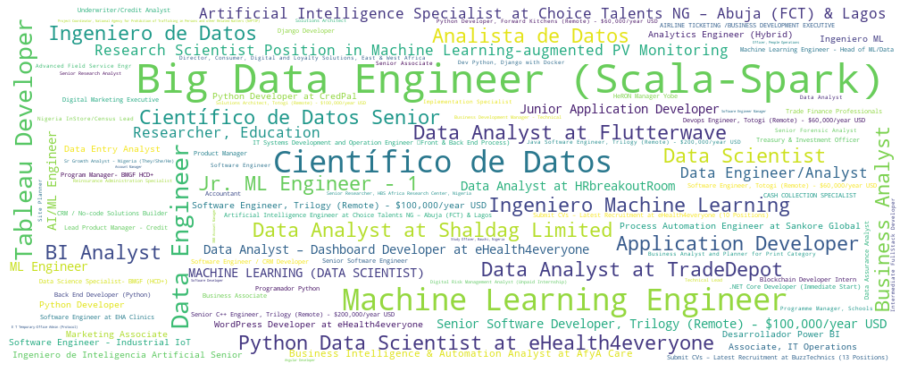

In [13]:
list_titles = WordCloud(width=1000,height=400, background_color='white',stopwords=['data scientist'])
list_titles.generate_from_frequencies(job_popularity.to_dict())

plt.figure(figsize=(16, 8))
plt.imshow(list_titles, interpolation="bilinear")
plt.axis('off')

so we can begin analysis and visualisation 

### Data Cleaning

In [14]:
df1=df.copy()

In [15]:
df1.shape

(141, 5)

In [16]:
df1.duplicated().sum()

6

In [17]:
df1.drop_duplicates(inplace=True)

In [18]:
df1["job_title"]=df1["job_title"].str.replace('(-\s[^\n]+)|at\s[^\n]+',' ', regex=True)
df1["job_title"]=df1["job_title"].str.replace('(,\s[^\n]+)|\s\([^\n]+',' ', regex=True)
df1['company_name']= df1['company_name'].str.replace('[\[\]]|(,\s[^\n]+)|[^\w ]',' ', regex = True)
df1['location']= df1['location'].str.replace('[\[\]]|(,\s[^\n]+)|[^\w ]',' ',regex = True)
                                                   

In [19]:
df1['location']=df1['location'].str.replace('Lagos State','Lagos')
df1['location']=df1['location'].str.replace('Lekki','Lagos')
df1['location']=df1['location'].str.replace('Federal Capital Territory','Abuja')
df1['location']=df1['location'].str.replace('Kano State University Of Science And Technology','Kano')
df1['location']=df1['location'].str.replace('Ibeju Lekki','Lagos')


In [20]:
df1[df1['job_title'].str.contains('data')]

,job_title,company_name,location,description,workplace_type


#### Conclusion

There seems to be alot of Big data engineer request. I fail to see the big difference between Big data engineering and data engineering , so we will merge them.

A Tableau Developer uses the Tableau platform for data analysis, data visualization, and the BI process of an organization.A data analyst might not know Tableau sounds a bit silly so we will turn all tableau developers to Data analyst.

Not alot of senior or junior levels so they will be merged to their respective fields

In [21]:
df1["job_title"]=df1["job_title"].str.lower()

In [22]:
# A function that replaces the job title if it contains a certain sub string.
def replace_title(title):
    # Lowercase the titles first to keep consistency    
 
    if 'data scientist' in title or 'data science' in title: 
        return 'Data Scientist'
    elif 'machine' in title or 'ml' in title or 'machine learning' in title or 'artificial' in title:
        return 'Machine learning engineer'
    elif 'data engineer' in title or 'analytics engineer' in title :
        return 'Data Engineer' 
    elif 'data analyst'in title or 'tableau' in title:
        return 'Data Analyst'
    elif 'solutions architect' in title:
        return 'Data Architect'
    elif 'business analyst' in title or 'bi analyst'in title or 'business intelligence' in title or 'growth' in title:
        return 'Business Analyst'
    else:
        return title

# Apply function to title column
df1['job_title'] = df1['job_title'].apply(replace_title)

In [23]:
df1.shape

(135, 5)

lets remove all the other jobs that arent part of the created function

In [24]:
# create a list of the required jobs
Data=['Data Analyst','Data Engineer','Machine learning engineer','Data Scientist','Business Analyst','Data Architect']

In [25]:
df2=df1[df1['job_title'].isin(Data)]

In [26]:
df2.shape

(53, 5)

In [27]:
df2

,job_title,company_name,location,description,workplace_type
1,Business Analyst,Kuda,Nigeria,About the job\nDescription\n\nSummary\n\nKuda ...,On-site
2,Machine learning engineer,Turing,Lagos,About the job\nA multi-billion pharmaceutical ...,Remote
4,Data Scientist,eHealth4everyone,Abuja,About the job\nNever Miss a Job Update Again. ...,On-site
6,Data Engineer,Data2Bots,Lagos,About the job,On-site
7,Machine learning engineer,KAUST King Abdullah University of Science a...,Kano,About the job,On-site
8,Data Analyst,TradeDepot,Lagos,About the job,On-site
9,Data Engineer,Turing,Lagos,About the job,Remote
11,Machine learning engineer,Choice Talents NG,Lagos,About the job\nThis job is sourced from a job ...,On-site
12,Machine learning engineer,Turing,Lagos,About the job\nA fast-growing company that is ...,Remote
14,Machine learning engineer,Turing,Lagos,About the job\nAn NYSE-listed company that has...,Remote


In [29]:
df2['location']=df2['location'].str.replace('Lekki','Lagos')
df2['location']=df2['location'].str.replace('Federal Capital Territory','Abuja')
df2['location']=df2['location'].str.replace('Kano State University Of Science And Technology','Kano')
df1['location']=df1['location'].str.replace('Ibeju Lagos','Lagos')


C:\Users\Lawalson\AppData\Local\Temp/ipykernel_11504/3650961607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location']=df2['location'].str.replace('Lekki','Lagos')
C:\Users\Lawalson\AppData\Local\Temp/ipykernel_11504/3650961607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location']=df2['location'].str.replace('Federal Capital Territory','Abuja')
C:\Users\Lawalson\AppData\Local\Temp/ipykernel_11504/3650961607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [30]:
df2.describe(include='all')

,job_title,company_name,location,description,workplace_type
count,53,53,53,53,53
unique,6,23,9,44,3
top,Machine learning engineer,Turing,Lagos,About the job\nJob Description\n\nAbout You\n\...,Remote
freq,17,20,39,7,30


this dataset has more ML engineers 

the most job request are coming from Turing 

Lagos is the technological hub of Nigeria at this point

on the positive side the presence of remote opportunities is good

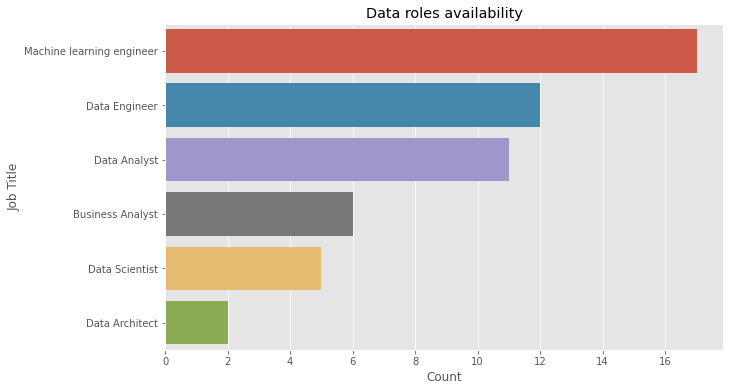

In [31]:
# Plot histogram of the different job titles in the dataset
sns.countplot(y= 'job_title', data = df2, order = df2['job_title'].value_counts().index)

# Add labels and titles
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Data roles availability')

plt.show()

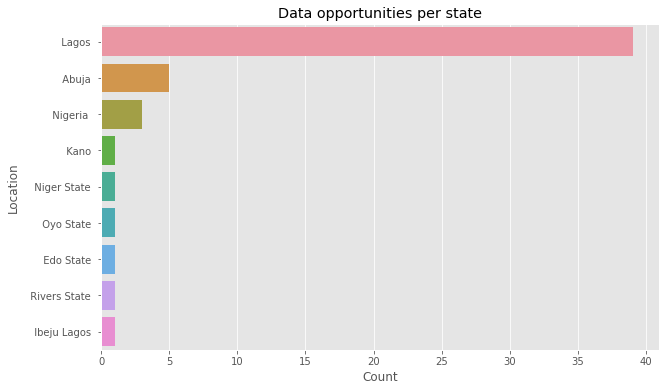

In [32]:
sns.countplot(y= 'location', data = df2, order = df2['location'].value_counts().index)

# Add labels and titles
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Data opportunities per state')

plt.show()

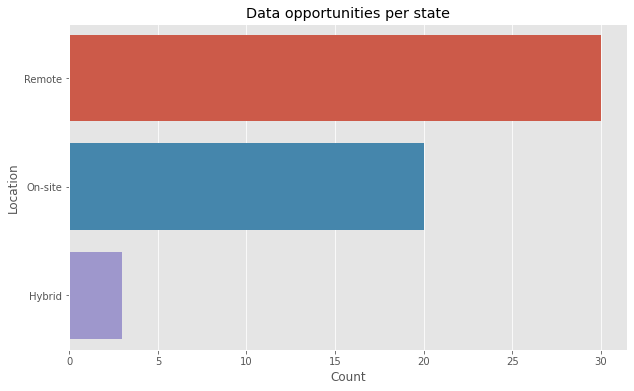

In [33]:
sns.countplot(y= 'workplace_type', data = df2, order = df2['workplace_type'].value_counts().index)

# Add labels and titles
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Data opportunities per state')

plt.show()

In [34]:
df2['description']

1      About the job\nDescription\n\nSummary\n\nKuda ...
2      About the job\nA multi-billion pharmaceutical ...
4      About the job\nNever Miss a Job Update Again. ...
6                                          About the job
7                                          About the job
8                                          About the job
9                                          About the job
11     About the job\nThis job is sourced from a job ...
12     About the job\nA fast-growing company that is ...
14     About the job\nAn NYSE-listed company that has...
15     About the job\nThis job is sourced from a job ...
16     About the job\nJob Description\n\nAbout You\n\...
19     About the job\nJob Description\n\nAbout You\n\...
20     About the job\nJob Description\n\nAbout You\n\...
21     About the job\nA multinational, U.S.-based big...
23     About the job\nNever Miss a Job Update Again. ...
25     About the job\nJob Description\n\nAbout You\n\...
26     About the job\nA rapidly

In [35]:
# Visualize the distribution of words use in job descriptions

# Create a new column called word count
df2['word_count'] = df2['description'].str.split().str.len()

C:\Users\Lawalson\AppData\Local\Temp/ipykernel_11504/2624494296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['word_count'] = df2['description'].str.split().str.len()


In [36]:
summary = df2['word_count'].describe(percentiles = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])
summary

count      53.000000
mean      339.471698
std       216.138453
min         3.000000
10%       163.800000
20%       196.400000
30%       237.000000
40%       276.200000
50%       305.000000
60%       368.000000
70%       368.000000
80%       455.800000
90%       567.800000
100%     1304.000000
max      1304.000000
Name: word_count, dtype: float64

Text(0.5, 1.0, 'Distribution of number of words used in job descriptions')

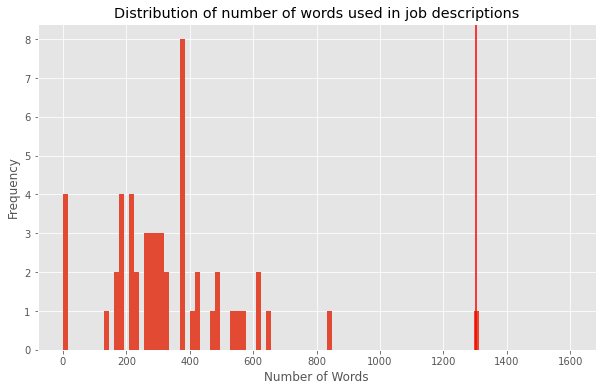

In [37]:
# Plot the distribution of the word numbers per description
df2['word_count'].plot.hist(xticks = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600], bins = 100, range = [0, 1600]).axvline(x= summary['100%'], c = 'red')

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of number of words used in job descriptions')

By analyzing the number of words used in the job descriptions,  we can see that the job descriptions are not too lengthy or too short, but follow a standard length. 

so lets extract skills with Fuzzy Phrase Matching and string matching... Extract Skills and Tools From Job Descriptions


#### Lets look at the tools required of Data professionals in Nigeria

In [38]:
from fuzzywuzzy import fuzz
# The most common skills and the most sought after skills, as well as rare ones
# list of skills to match
tools = ["Python","R","SQL","Scala","NumPy","Pandas","MongoDB","Seaborn",'Excel','Selenium ','SPSS', 'SAS','Power BI','PostgreSQL','MySQL','Scala Spark',
                      "SciPy","Scikit-Learn","TensorFlow","PyTorch","Keras","XGBoost","LightGBM",'Power Query','Tableau','Kubernetes','OpenShift','Agile',
                      "Plotly","Dask","Spark","Hadoop","AWS","Google Cloud",'Java','Javascript','DevOps',' Q-Learning','Airflow','Dataproc',' C/C++','Heroku ',
                      "Azure","IBM Watson","NLTK","OpenCV","Gensim","StatsModels",' Ruby','BigQuery',' PL/SQL','Docker','Linux','sciket-learn',
                      "Theano","Caffe","Keras-Tuner","Auto-Keras","Auto-Sklearn","Shap","ELI5","Bokeh",'React','Sidekiq','Celery','Transformers','Hive',
                      "Folium","ggplot","plotnine","Geopandas","Datashader","Yellowbrick","H2O.ai","Flask",'Vagrant','Ansible','Packer','Django','HTML',' Bootstrap', 'jQuery',
                      "Dash","Streamlit","FastAPI","PySpark","TensorBoard","cuDF","NetworkX","BeautifulSoup",'KPI','NLP','AWS S3','DynamoDB','Redis','Druid','Kafka',
                      "Scrapy","Numba","Cython", "Apache", "Git",'Julia','Gurobi', 'CPLEX','Apache Spark','SAP']



def match_phrases(description, phrases):
    matched_phrase = [phrase for phrase in phrases if fuzz.partial_token_set_ratio(description, phrase) >= 90]
    # Only return matches once
    unique_matches = list(set(matched_phrase))
    return unique_matches

df2['Tools'] = df2['description'].apply(lambda x: match_phrases(x, tools))

C:\Users\Lawalson\AppData\Local\Temp/ipykernel_11504/2833963955.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Tools'] = df2['description'].apply(lambda x: match_phrases(x, tools))


#### Let us visualize the results of our phrase matching with a Function

In [39]:
import collections
# Visualization functions
    
# Function used to generate countplot 
def generate_countplot(df, column, top_n = None):
    words = [word for row in df[column] for word in row]
    
    counter = collections.Counter(words)
    
    top_n_words = [word for word, count in counter.most_common(top_n)]
    
    plt.figure(figsize = (10,5))
    
    sns.countplot(x = words, order = top_n_words)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.show()

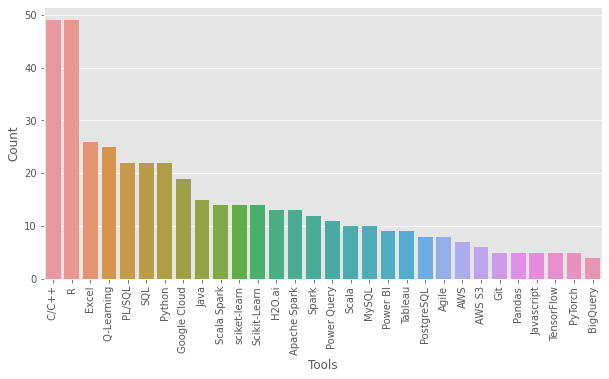

In [40]:
generate_countplot(df2, 'Tools', 30)

**SUMMARY**

Well its safe to say the Nigeria data ecosystem is pretty different from any data proffesional requirements around the world

actually surprised to see the demand for C/C++

R is far more required than Python but there is significant presence of Java and little JS

Excel is still very important, Power BI and Tableau are both equally deamanded

The most reqired RDBM is MySQL, Google cloud is the most required cloud computing service 


#### Now lets look at the task required by data professionals in Nigeria

In [41]:
tasks = ["Python programming", "Statistics" ,"Probability", "Machine learning","Data visualization","preprocessing" "cleaning","database management", "analysis", "modeling",    
         "Deep learning","Data engineering", "visualization", "manipulation", "storage", "Cloud computing", "ETL", 'clustering','regression', 'decision trees',   
         "warehousing","governance", "security","storytelling", "product development", "Natural language processing", "NLP",'A/B testing',    
         "Computer vision", "Business intelligence", "mining","feature engineering", "Time series analysis", "Regression analysis", "Classification algorithms",    
         "Clustering algorithms", "Neural networks", "Decision trees", "random forests", "Support vector machines", "SVM", "K-nearest neighbors", "KNN", "Reinforcement learning","Hyperparameter tuning",    
         "Ensemble learning", "Transfer learning", "Unsupervised learning","Supervised learning","Exploratory data analysis", "EDA", "quality control",    
         "Data interpretation", "Collaboration", "communication", "Project management", "Agile development", "Software engineering", "Version control", "Debugging", "troubleshooting",
         "Continuous integration and deployment (CI/CD)", "optimization", 'deployment']


df2['Skills'] = df2['description'].apply(lambda x: match_phrases(x, tasks))

C:\Users\Lawalson\AppData\Local\Temp/ipykernel_11504/3640806297.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Skills'] = df2['description'].apply(lambda x: match_phrases(x, tasks))


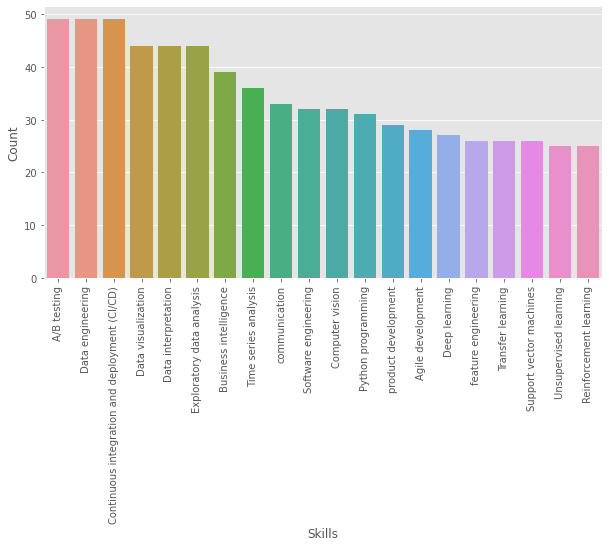

In [42]:
generate_countplot(df2, 'Skills', 20)

#### SUMMARY

As we can see from the this countplot, the most common skill asked for in data professionals job posting is CI/CD followed by Data Engineering

Communication is also strongly demanded

#### Years of Experience Required 

We will use regular expressions to extract the years of experience mentioned in a job posting by matching specific patterns in the text. By defining a regex pattern that matches the wording typically used to specify years of experience in a job posting, we can extract this information

In [43]:

def extract_years_of_experience(description):
    # Regular expression pattern to match the years of experience information
    pattern = re.compile(r'(\d+)\s*years?', re.IGNORECASE)
    
    # search for the pattern in the job description
    match = re.search(pattern, description)
    
    # if there is a match, return the matched string
    if match:
        return match.group(0)
    else:
        return "Not Specified"
    
df2['Years_of_Experience'] = df2['description'].apply(extract_years_of_experience)

C:\Users\Lawalson\AppData\Local\Temp/ipykernel_11504/2359626529.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Years_of_Experience'] = df2['description'].apply(extract_years_of_experience)


<AxesSubplot:>

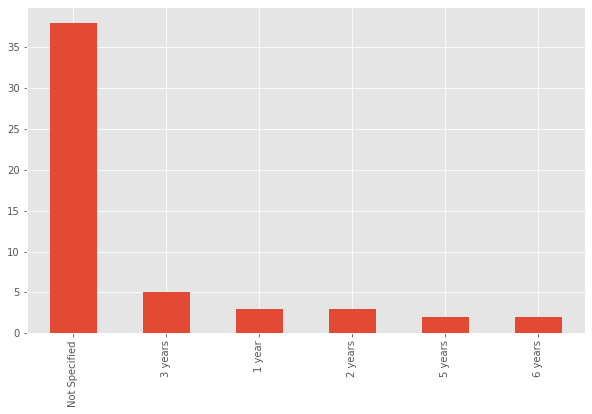

In [44]:
df2['Years_of_Experience'].value_counts().plot(kind='bar')

You could see this as a problem , as the plot suggest that majority of job posting in Nigeria dont state years of experence or it might be just how we queried it

But its safe to assume the most required job experience duration is 3 years

we can go further in querying the data , by extracting all the numbers in the description and mapping them

In [45]:
# Extract just the numbers using regular expression
df2['years'] = df2['Years_of_Experience'].str.extract(r'(\d+)').fillna(0).astype(int)

C:\Users\Lawalson\AppData\Local\Temp/ipykernel_11504/988552219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['years'] = df2['Years_of_Experience'].str.extract(r'(\d+)').fillna(0).astype(int)


In [46]:
df2['years'].value_counts()

0    38
3     5
1     3
2     3
5     2
6     2
Name: years, dtype: int64

In [47]:
df2['experience'] = df2['years'].apply(lambda x: 'Not Specified' if x == 0 or x >= 38
                                    else ('1 to 3 years' if x >= 1 and x <= 3
                                    else ('4 to 6 years' if x >= 4 and x <= 6 
                                    else '6+ years')))

C:\Users\Lawalson\AppData\Local\Temp/ipykernel_11504/975153481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['experience'] = df2['years'].apply(lambda x: 'Not Specified' if x == 0 or x >= 38


<AxesSubplot:xlabel='experience', ylabel='count'>

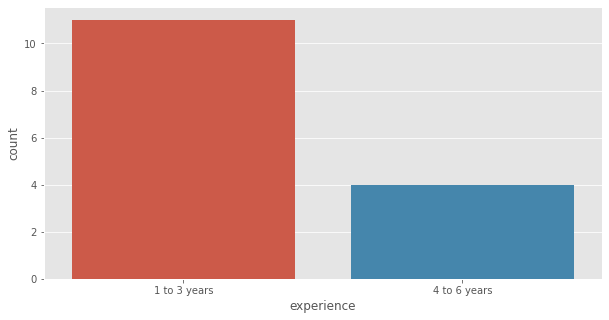

In [48]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'experience', data = df2[df2['experience'] != 'Not Specified'])

As previously assumed the most required year of experience is within 1 to 3 years 

lets see if there is a correlation between year of experience and job title

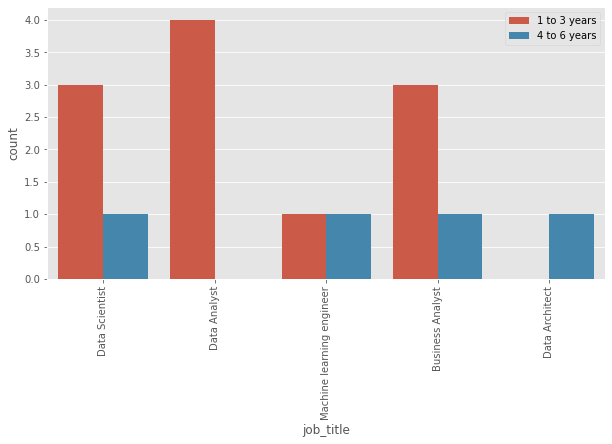

In [49]:
# Set size of figure
plt.figure(figsize = (10,5))

sns.countplot(data = df2[df2['experience'] != 'Not Specified'], x = 'job_title', hue = 'experience')
# rotate the x-axis labels by 90 degrees
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()

This plot suggest its easier to get into the data analysis field as it mostly requires 1 to 3 years experience , while Data architect need to be more experienced

#### Lets look at the educational requirements for data jobs in Nigeria

In [50]:
def extract_education_level(description):
    # Dictionary that maps education levels to their abbreviations
    education_levels = {
        'bachelor': ['bs', 'bachelor'],
        'master': ['ms', 'master'],
        'phd': ['phd'],
        'doctorate': ['doctorate']
    }
    # initialize the education level and maximum ratio to 0
    education_level = None
    max_ratio = 0
    # iterate over the education levels and their abbreviations
    for level, abbreviations in education_levels.items():
        level_variants = [level] + abbreviations
        for variant in level_variants:
            # calculate the fuzzy matching ratio between the variant and the job description
            ratio = fuzz.partial_token_set_ratio(variant, description)
            if ratio > max_ratio:
                max_ratio = ratio
                education_level = level
    if max_ratio >= 80:
        return education_level
    else:
        return 'Not Specified'
    
df2['Education_Level'] = df2['description'].apply(extract_education_level)
    

C:\Users\Lawalson\AppData\Local\Temp/ipykernel_11504/3961602786.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Education_Level'] = df2['description'].apply(extract_education_level)


<AxesSubplot:xlabel='Education_Level', ylabel='count'>

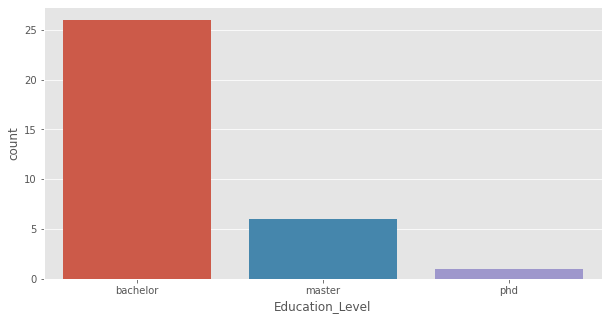

In [51]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Education_Level', data = df2[df2['Education_Level'] != 'Not Specified'])

As expected the most required and minimum level of education is Bachelors

lets see how they compare with job title

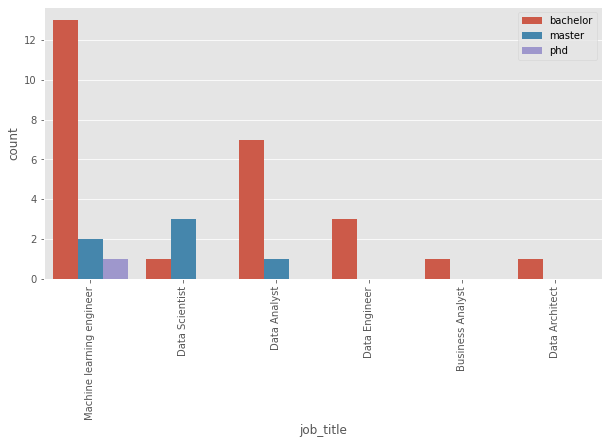

In [52]:
# Set size of figure
plt.figure(figsize = (10,5))

sns.countplot(data = df2[df2['Education_Level'] != 'Not Specified'], x = 'job_title', hue = 'Education_Level')
# rotate the x-axis labels by 90 degrees
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()

Surprisingly data science job posting ask for masters ,more than machine learning jobs

In [53]:
df2.head()

,job_title,company_name,location,description,workplace_type,word_count,Tools,Skills,Years_of_Experience,years,experience,Education_Level
1,Business Analyst,Kuda,Nigeria,About the job\nDescription\n\nSummary\n\nKuda ...,On-site,570,"[Power BI, Azure, C/C++, BigQuery, PL/SQL, A...","[Data visualization, Statistics, Software engi...",Not Specified,0,Not Specified,Not Specified
2,Machine learning engineer,Turing,Lagos,About the job\nA multi-billion pharmaceutical ...,Remote,237,"[Power Query, Power BI, C/C++, H2O.ai, Python...","[Data visualization, Unsupervised learning, Ne...",Not Specified,0,Not Specified,bachelor
4,Data Scientist,eHealth4everyone,Abuja,About the job\nNever Miss a Job Update Again. ...,On-site,535,"[Power Query, C/C++, NLTK, Pandas, H2O.ai, Py...","[Data visualization, Unsupervised learning, So...",1 year,1,1 to 3 years,master
6,Data Engineer,Data2Bots,Lagos,About the job,On-site,3,[],[],Not Specified,0,Not Specified,Not Specified
7,Machine learning engineer,KAUST King Abdullah University of Science a...,Kano,About the job,On-site,3,[],[],Not Specified,0,Not Specified,Not Specified


In [54]:
df2.to_csv('data_prof.csv')

In [56]:
df2.query('job_title == "Business Analyst"')

,job_title,company_name,location,description,workplace_type,word_count,Tools,Skills,Years_of_Experience,years,experience,Education_Level
1,Business Analyst,Kuda,Nigeria,About the job\nDescription\n\nSummary\n\nKuda ...,On-site,570,"[Power BI, Azure, C/C++, BigQuery, PL/SQL, A...","[Data visualization, Statistics, Software engi...",Not Specified,0,Not Specified,Not Specified
41,Business Analyst,AfyA Care,Lagos,About the job\nNever Miss a Job Update Again. ...,On-site,305,"[Power Query, Power BI, C/C++, PL/SQL, R, SQL]","[Project management, Data visualization, Time ...",2 years,2,1 to 3 years,Not Specified
95,Business Analyst,Assets Microfinance Bank,Lagos,About the job\nAssets Microfinance bank is a t...,On-site,334,"[SPSS, C/C++, SAS, Excel, R]","[Project management, Data visualization, Time ...",Not Specified,0,Not Specified,Not Specified
114,Business Analyst,Alpha Mead Group,Nigeria,About the job\nCompany Description\n\nAlpha Me...,On-site,489,"[Excel, R, C/C++]","[Data visualization, Software engineering, Dat...",3 years,3,1 to 3 years,bachelor
116,Business Analyst,HP,Lagos,About the job\nWe are looking for a Business A...,Hybrid,473,"[ C/C++, sciket-learn, Excel, R, Scikit-Learn]","[manipulation, Data visualization, Time series...",6 years,6,4 to 6 years,Not Specified
120,Business Analyst,Glovo,Lagos,About the job\nAbout Glovo\n\nWe’re a Barcelon...,On-site,650,"[ C/C++, Python, PL/SQL, Excel, R, Google Clo...","[Data visualization, Unsupervised learning, Da...",3 years,3,1 to 3 years,Not Specified


In [57]:
df2.query('job_title == "Data Analyst"')

,job_title,company_name,location,description,workplace_type,word_count,Tools,Skills,Years_of_Experience,years,experience,Education_Level
8,Data Analyst,TradeDepot,Lagos,About the job,On-site,3,[],[],Not Specified,0,Not Specified,Not Specified
15,Data Analyst,Shaldag Limited,Lagos,About the job\nThis job is sourced from a job ...,On-site,281,"[Scikit-Learn, R, C/C++, sciket-learn]","[quality control, Project management, Data vis...",2 years,2,1 to 3 years,bachelor
21,Data Analyst,Turing,Lagos,"About the job\nA multinational, U.S.-based big...",Remote,296,"[ C/C++, PL/SQL, Excel, R, Tableau, SQL]","[Project management, Data visualization, Explo...",Not Specified,0,Not Specified,bachelor
23,Data Analyst,HRbreakoutroom,Lagos,About the job\nNever Miss a Job Update Again. ...,On-site,333,"[ C/C++, PL/SQL, Excel, R, Q-Learning, SQL]","[Data visualization, Unsupervised learning, So...",Not Specified,0,Not Specified,Not Specified
27,Data Analyst,Flutterwave,Lagos,About the job\nNever Miss a Job Update Again. ...,On-site,402,"[Power Query, Power BI, C/C++, Python, PL/SQ...","[Data visualization, Software engineering, Dat...",3 years,3,1 to 3 years,bachelor
30,Data Analyst,Turing,Lagos,About the job\nA Silicon Valley-based company ...,Remote,210,"[Power Query, C/C++, PL/SQL, Excel, R, AWS, ...","[Project management, Data visualization, Time ...",Not Specified,0,Not Specified,bachelor
52,Data Analyst,eHealth4everyone,Abuja,About the job\nNever Miss a Job Update Again. ...,Hybrid,368,"[Power Query, Power BI, C/C++, PL/SQL, Excel...","[Decision trees, Data visualization, Time seri...",Not Specified,0,Not Specified,Not Specified
85,Data Analyst,TradeDepot,Lagos,About the job\nThis job is sourced from a job ...,On-site,480,"[Power Query, Power BI, C/C++, BigQuery, scik...","[Data visualization, Statistics, Software engi...",2 years,2,1 to 3 years,bachelor
108,Data Analyst,NewGlobe,Lagos,"About the job\nData Analyst, Schools Lagos, Ni...",On-site,1304,"[ C/C++, SAS, sciket-learn, Excel, R, Scikit-L...","[Data visualization, Unsupervised learning, St...",Not Specified,0,Not Specified,master
121,Data Analyst,Turing,Lagos,"About the job\nA multinational, U.S.-based big...",Remote,296,"[ C/C++, PL/SQL, Excel, R, Tableau, SQL]","[Project management, Data visualization, Explo...",Not Specified,0,Not Specified,bachelor


In [58]:
df2.query('job_title == "Data Scientist"')

,job_title,company_name,location,description,workplace_type,word_count,Tools,Skills,Years_of_Experience,years,experience,Education_Level
4,Data Scientist,eHealth4everyone,Abuja,About the job\nNever Miss a Job Update Again. ...,On-site,535,"[Power Query, C/C++, NLTK, Pandas, H2O.ai, Py...","[Data visualization, Unsupervised learning, So...",1 year,1,1 to 3 years,master
28,Data Scientist,Reliance Health,Lagos,About the job\nThe Data Scientist is responsib...,Remote,138,"[ C/C++, H2O.ai, Python, Excel, R, NLP, Q-Lea...","[Data visualization, Unsupervised learning, Da...",3 years,3,1 to 3 years,Not Specified
70,Data Scientist,Vendease YC W21,Ibeju Lagos,About the job\nOverview: We are seeking the se...,On-site,430,"[Excel, MySQL, AWS S3, Scala Spark, C/C++, sc...","[random forests, Data visualization, Unsupervi...",Not Specified,0,Not Specified,master
96,Data Scientist,DAI,Nigeria,About the job\nVacancy for the position of Dat...,On-site,621,"[SPSS, C/C++, SAS, PL/SQL, Excel, R, Javascr...","[Data visualization, Unsupervised learning, St...",6 years,6,4 to 6 years,bachelor
103,Data Scientist,eHealth4everyone,Abuja,About the job\nThis job is sourced from a job ...,On-site,559,"[Power Query, C/C++, NLTK, Pandas, sciket-lea...","[Data visualization, Unsupervised learning, So...",1 year,1,1 to 3 years,master


In [61]:
df2.query('job_title == "Machine learning engineer"')

,job_title,company_name,location,description,workplace_type,word_count,Tools,Skills,Years_of_Experience,years,experience,Education_Level
2,Machine learning engineer,Turing,Lagos,About the job\nA multi-billion pharmaceutical ...,Remote,237,"[Power Query, Power BI, C/C++, H2O.ai, Python...","[Data visualization, Unsupervised learning, Ne...",Not Specified,0,Not Specified,bachelor
7,Machine learning engineer,KAUST King Abdullah University of Science a...,Kano,About the job,On-site,3,[],[],Not Specified,0,Not Specified,Not Specified
11,Machine learning engineer,Choice Talents NG,Lagos,About the job\nThis job is sourced from a job ...,On-site,319,"[Scala Spark, C/C++, H2O.ai, sciket-learn, Ja...","[Data visualization, Unsupervised learning, So...",Not Specified,0,Not Specified,bachelor
12,Machine learning engineer,Turing,Lagos,About the job\nA fast-growing company that is ...,Remote,209,"[ C/C++, H2O.ai, sciket-learn, Python, Excel, ...","[Unsupervised learning, Software engineering, ...",Not Specified,0,Not Specified,bachelor
14,Machine learning engineer,Turing,Lagos,About the job\nAn NYSE-listed company that has...,Remote,163,"[ Q-Learning, R, C/C++]","[Deep learning, Project management, Time serie...",Not Specified,0,Not Specified,bachelor
29,Machine learning engineer,Turing,Lagos,"About the job\nEn Turing, ayudamos a los progr...",Remote,273,"[H2O.ai, C/C++, Excel, R, Q-Learning]","[Data visualization, Unsupervised learning, So...",Not Specified,0,Not Specified,bachelor
34,Machine learning engineer,Turing,Lagos,About the job\nAn NYSE-listed company that has...,Remote,178,"[ C/C++, Python, R, Kubernetes, Q-Learning, D...","[Unsupervised learning, Software engineering, ...",Not Specified,0,Not Specified,bachelor
37,Machine learning engineer,Conclase,Lagos,About the job\nJob Purpose\n\nWe are looking f...,Remote,167,"[ C/C++, sciket-learn, Auto-Keras, Python, Exc...","[Data visualization, Unsupervised learning, St...",5 years,5,4 to 6 years,master
38,Machine learning engineer,Turing,Lagos,About the job\nA well-established company that...,Remote,212,"[ C/C++, H2O.ai, Python, Excel, R, Q-Learning]","[Data visualization, Unsupervised learning, So...",Not Specified,0,Not Specified,bachelor
39,Machine learning engineer,Turing,Lagos,"About the job\nEn Turing, ayudamos a los progr...",Remote,277,"[Pandas, Git, MySQL, Keras, Keras-Tuner, AWS S...","[Data visualization, Unsupervised learning, St...",Not Specified,0,Not Specified,bachelor


In [62]:
df2.query('job_title == "Data Engineer"')

,job_title,company_name,location,description,workplace_type,word_count,Tools,Skills,Years_of_Experience,years,experience,Education_Level
6,Data Engineer,Data2Bots,Lagos,About the job,On-site,3,[],[],Not Specified,0,Not Specified,Not Specified
9,Data Engineer,Turing,Lagos,About the job,Remote,3,[],[],Not Specified,0,Not Specified,Not Specified
16,Data Engineer,Applaudo,Abuja,About the job\nJob Description\n\nAbout You\n\...,Remote,368,"[Scala Spark, C/C++, Scala, Apache Spark, Spa...","[Data visualization, Cloud computing, Data int...",Not Specified,0,Not Specified,Not Specified
19,Data Engineer,Applaudo,Abuja,About the job\nJob Description\n\nAbout You\n\...,Remote,368,"[Scala Spark, C/C++, Scala, Apache Spark, Spa...","[Data visualization, Cloud computing, Data int...",Not Specified,0,Not Specified,Not Specified
20,Data Engineer,Applaudo,Niger State,About the job\nJob Description\n\nAbout You\n\...,Remote,368,"[Scala Spark, C/C++, Scala, Apache Spark, Spa...","[Data visualization, Cloud computing, Data int...",Not Specified,0,Not Specified,Not Specified
25,Data Engineer,Applaudo,Lagos,About the job\nJob Description\n\nAbout You\n\...,Remote,368,"[Scala Spark, C/C++, Scala, Apache Spark, Spa...","[Data visualization, Cloud computing, Data int...",Not Specified,0,Not Specified,Not Specified
26,Data Engineer,Turing,Lagos,About the job\nA rapidly-growing company that ...,Remote,188,"[Airflow, Dataproc, C/C++, BigQuery, Python, ...","[quality control, Data visualization, Time ser...",Not Specified,0,Not Specified,bachelor
31,Data Engineer,Applaudo,Oyo State,About the job\nJob Description\n\nAbout You\n\...,Remote,368,"[Scala Spark, C/C++, Scala, Apache Spark, Spa...","[Data visualization, Cloud computing, Data int...",Not Specified,0,Not Specified,Not Specified
32,Data Engineer,Applaudo,Edo State,About the job\nJob Description\n\nAbout You\n\...,Remote,368,"[Scala Spark, C/C++, Scala, Apache Spark, Spa...","[Data visualization, Cloud computing, Data int...",Not Specified,0,Not Specified,Not Specified
35,Data Engineer,Applaudo,Rivers State,About the job\nJob Description\n\nAbout You\n\...,Remote,368,"[Scala Spark, C/C++, Scala, Apache Spark, Spa...","[Data visualization, Cloud computing, Data int...",Not Specified,0,Not Specified,Not Specified


In [63]:
df2.query('job_title == "Data Architect"')

,job_title,company_name,location,description,workplace_type,word_count,Tools,Skills,Years_of_Experience,years,experience,Education_Level
117,Data Architect,Crossover,Lagos,About the job\nCrossover is the world's #1 sou...,Remote,619,"[Kafka, MySQL, jQuery, Scala Spark, C/C++, sc...","[Project management, Time series analysis, Dat...",5 years,5,4 to 6 years,Not Specified
123,Data Architect,Andela,Lagos,About the job\nAbout Andela\n\nAndela exists t...,Hybrid,835,"[Azure, C/C++, Javascript, Agile, R, AWS, Goo...","[Software engineering, Cloud computing, commun...",Not Specified,0,Not Specified,bachelor
